In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = '../../data/roberta_all.json'
df = pd.read_json(data)
df.head(3)

,Unnamed: 0.1,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,...,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator,roberta_negative,roberta_neutral,roberta_positive,roberta_label,roberta_score,roberta_argmax
0,0,0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry_bucky hes lucky a #chrisrocklive ...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",...,0.448980,0.444444,None,None,0.730327,0.228264,0.041409,negative,NaN,0.730327
1,1,1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",...,0.367347,0.333333,None,None,0.875976,0.117147,0.006877,negative,NaN,0.875976
2,2,2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",...,0.367347,0.333333,None,None,0.875976,0.117147,0.006877,negative,NaN,0.875976


In [4]:
cols = ['text','our_label','annotator','roberta_label']
df.loc[~df['annotator'].isna() & (df['our_label'] == df['roberta_label'])][cols].shape  # (191, 4)
df.loc[~df['annotator'].isna() & (df['our_label'] != df['roberta_label'])][cols].shape  # (109, 4)

# any opposite extremes?  
df.loc[(~df['annotator'].isna()) & 
       (df['our_label'] != df['roberta_label']) & 
       ((df['our_label'] != 'neutral') & (df['roberta_label'] != 'neutral'))][cols]   # 8 lines total, otherwise we're closer.

,text,our_label,annotator,roberta_label
7261,RT @officialloozr: Loozr is the AI tool that r...,negative,anu,positive
13219,@AdamKinzinger Hunter and Joe Biden are respon...,positive,sarik,negative
18667,RT @rohini_sgh: Breaking news from Noida chann...,positive,anu,negative
22215,@provemewrong411 @blackdiammon Russian bitches...,positive,sarik,negative
23224,RT @DemocracyDocket: “D.C. statehood is the on...,negative,sarik,positive
23798,@GMB @susannareid100 @SuellaBraverman Contrary...,positive,sarik,negative
27508,@neimoeller @NikkeiAsia China would like Ukrai...,positive,anu,negative
29213,RT @JailletAlain: JUST NOW: Palpable nervousne...,positive,sarik,negative


<Axes: >

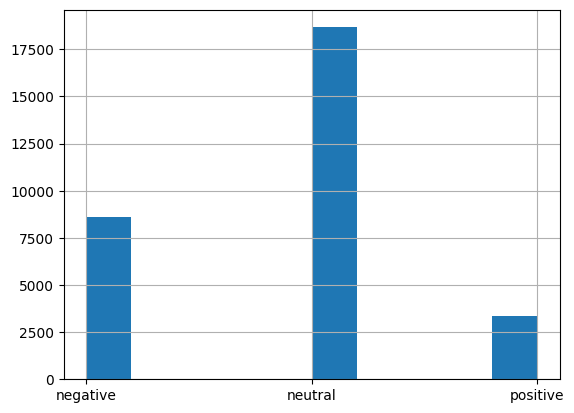

In [5]:
[x for x in df.columns if 'roberta' in x]
df['roberta_label'].hist()

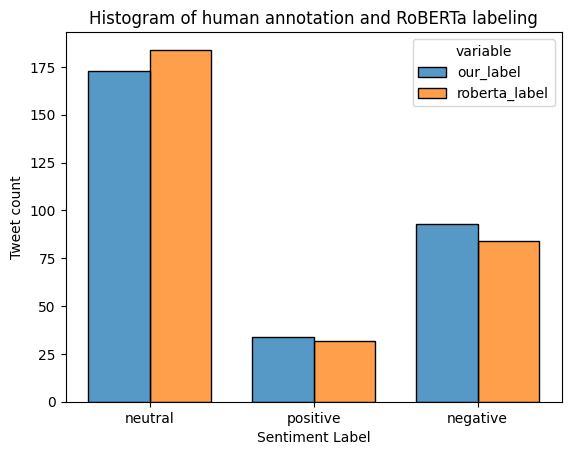

In [6]:
#df.loc[(~df['annotator'].isna())][['our_label', 'roberta_label']].hist()
# plot melted dataframe in a single command
ax = sns.histplot(df.loc[~df['annotator'].isna()][['our_label','roberta_label']].melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20);

ax.set(xlabel='Sentiment Label', ylabel='Tweet count', title='Histogram of human annotation and RoBERTa labeling')
plt.show()

### All Models?  4/18/23 Update

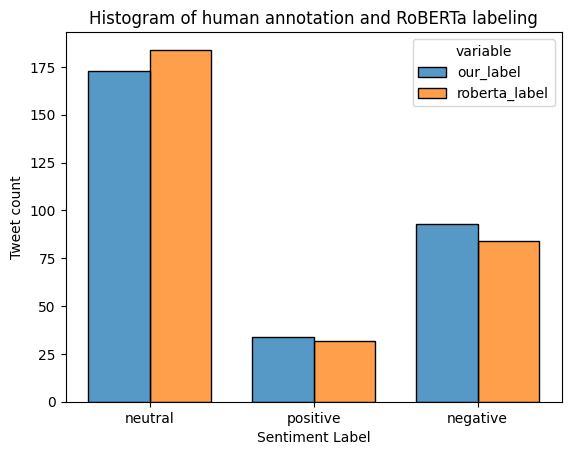

In [7]:
ax = sns.histplot(df.loc[~df['annotator'].isna()][['our_label','roberta_label']].melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20);

ax.set(xlabel='Sentiment Label', ylabel='Tweet count', title='Histogram of human annotation and RoBERTa labeling')
plt.show()

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'conversation_id', 'lang',
       'reply_settings', 'created_at', 'clean_text', 'text', 'author_id',
       'referenced_tweets', 'id', 'edit_history_tweet_ids',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.impression_count',
       'in_reply_to_user_id', 'geo.place_id', 'withheld.copyright',
       'withheld.country_codes', 'geo.coordinates.type',
       'geo.coordinates.coordinates', 'textblob_Polarity',
       'textblob_Subjectivity', 'vader_Polarity', 'vader_Subjectivity',
       'AFINN_scores', 'AFINN_sentiments', 'SentiWordNet_scores',
       'normalized_textblob_Polarity', 'normalized_textblob_Subjectivity',
       'normalized_vader_Polarity', 'normalized_vader_Subjectivity',
       'normalized_AFINN_scores', 'normalized_SentiWordNet_scores',
       'our_label', 'annotator', 'roberta_negative', 'roberta_neutral',
       'roberta_positive', 'roberta_label', 'roberta_sco

In [9]:
df[[x for x in df.columns if 'textblob' in x]].head()

,textblob_Polarity,textblob_Subjectivity,normalized_textblob_Polarity,normalized_textblob_Subjectivity
0,-0.038889,0.527778,0.480556,0.527778
1,0.000000,0.000000,0.500000,0.000000
2,0.000000,0.000000,0.500000,0.000000
3,0.246753,0.535714,0.623377,0.535714
4,0.246753,0.535714,0.623377,0.535714


### Combine all the model outputs... we don't have a way to score roberta do we?

In [26]:
!ls -lrt ../../data/ | grep normalized_annotated_all

all_df = pd.read_csv('../../data/normalized_annotated_all_2023-04-07_12.43.49.255973.tsv', delimiter='\t')
all_df.head(3)

-rw-r--r--  1 mcirtain  staff  18067647 Apr 10 19:53 normalized_annotated_all_2023-04-07_07.55.28.945037_OBSOLETE.tsv
-rw-r--r--  1 mcirtain  staff  18083911 Apr 10 19:53 normalized_annotated_all_2023-04-07_12.43.49.255973.tsv


,Unnamed: 0.1,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,...,AFINN_sentiments,SentiWordNet_scores,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator
0,0,0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry bucky lucky chrisrocklive worse th...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",...,negative,0.250,0.480556,0.527778,0.176602,0.640625,0.448980,0.444444,NaN,NaN
1,1,1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",...,negative,-0.625,0.500000,0.000000,0.217017,0.529018,0.367347,0.333333,NaN,NaN
2,2,2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",...,negative,-0.625,0.500000,0.000000,0.217017,0.529018,0.367347,0.333333,NaN,NaN
